<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(e_hat)_0_1_0_9_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.154272,79.239036,32.366047,0.300123,206.059477,205.908829,0.150648
1,0.0,1.0,86.147481,52.666501,98.148828,0.257951,247.220761,246.846781,0.373980
2,0.0,2.0,41.308105,88.279461,82.604398,-0.795970,221.395994,222.202889,-0.806895
3,0.0,3.0,92.798209,83.699854,31.357337,-0.564210,217.291191,218.032178,-0.740986
4,0.0,4.0,98.982709,93.850613,97.231883,-0.350520,299.714685,300.114561,-0.399875
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.505427,44.264832,86.727340,-0.348481,166.149118,166.629575,-0.480457
59996,999.0,56.0,25.774929,95.393020,60.374881,1.002727,192.545558,192.081302,0.464255
59997,999.0,57.0,55.205478,37.994521,78.005719,-0.922139,180.283579,181.033470,-0.749890
59998,999.0,58.0,53.560131,49.779453,69.181319,2.154825,184.675729,182.466509,2.209220


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.154272  79.239036  32.366047  ...  206.059477  205.908829  0.150648
      1.0    86.147481  52.666501  98.148828  ...  247.220761  246.846781  0.373980
      2.0    41.308105  88.279461  82.604398  ...  221.395994  222.202889 -0.806895
      3.0    92.798209  83.699854  31.357337  ...  217.291191  218.032178 -0.740986
      4.0    98.982709  93.850613  97.231883  ...  299.714685  300.114561 -0.399875
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   25.505427  44.264832  86.727340  ...  166.149118  166.629575 -0.480457
      56.0   25.774929  95.393020  60.374881  ...  192.545558  192.081302  0.464255
      57.0   55.205478  37.994521  78.005719  ...  180.283579  181.033470 -0.749890
      58.0   53.560131  49.779453  69.181319  ...  184.675729  182.466509  2.209220
      59.0   23.624446  90.317886  83.343565  ...  208.668181  207.748006  0.920176

[60000 rows x 7 columns]

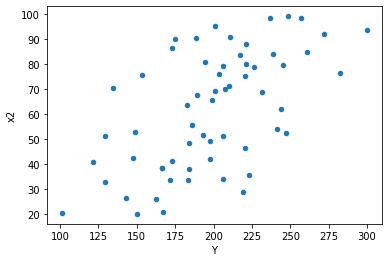

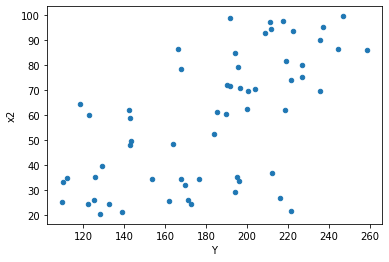

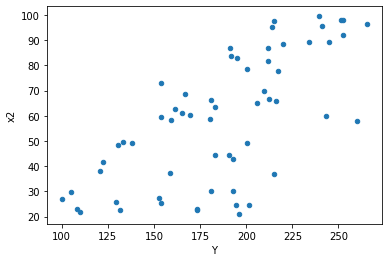

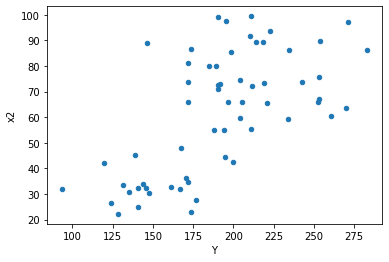

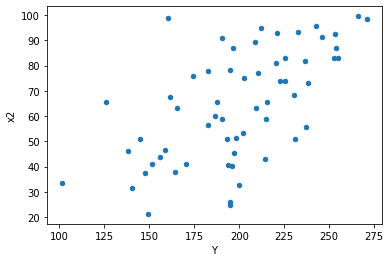

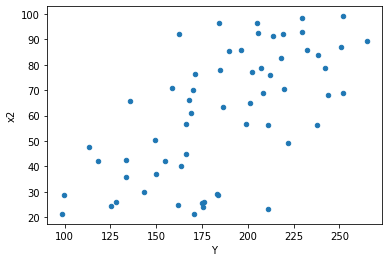

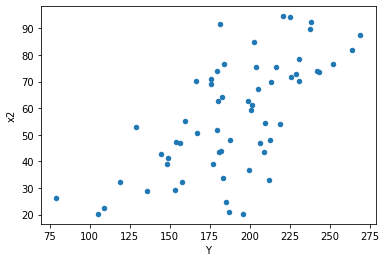

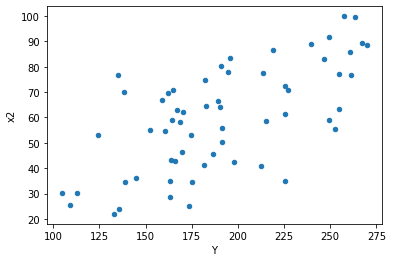

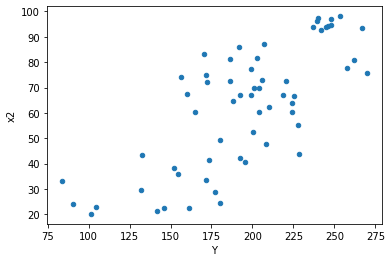

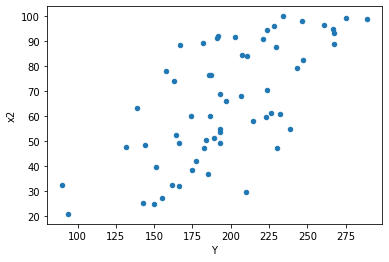

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม e_hat
    new_table_sort = new_table.sort_values('e_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,5.461426053490618,7.187103143249626,0.26006790730907703,0.34224300682141073,1.3159755479351511,0.5347741709537073,0.7326129145231464,0.26738708547685364,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,2.814793878801263,3.648227882543883,0.1340378037524411,0.17372513726399444,1.2960905983274182,0.5575989626514035,0.7212005186742982,0.27879948132570176,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,2.7165899004933696,4.003892565606538,0.1293614238330176,0.19066155074316848,1.4738671320538212,0.3812712938456626,0.8093643530771687,0.1906356469228313,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1.5070235879506355,6.43931988060885,0.0717630279976493,0.30663428002899284,4.272872655805955,0.0015760920624694474,0.9992119539687653,0.0007880460312347237,Reject001=0 : Heteroscedasticity
14.0,21.0,21.0,4.659676937700513,5.289717977896604,0.2218893779857387,0.2518913322807907,1.13521131370687,0.7740771112317939,0.612961444384103,0.38703855561589695,Reject001=1 : Homoscedasticity
18.0,21.0,21.0,2.907922362114685,4.351714072740208,0.13847249343403262,0.2072244796542956,1.4965028397716835,0.36296129790407905,0.8185193510479605,0.18148064895203952,Reject001=1 : Homoscedasticity
20.0,21.0,21.0,5.058150479362059,7.260628858140167,0.24086430854105043,0.3457442313400079,1.4354315649098457,0.4143632697885473,0.7928183651057263,0.20718163489427366,Reject001=1 : Homoscedasticity
21.0,21.0,21.0,4.710343434256946,7.898532300481975,0.2243020682979498,0.3761205857372369,1.67684849538534,0.24440317931574507,0.8777984103421275,0.12220158965787253,Reject001=1 : Homoscedasticity
26.0,21.0,21.0,1.638022808807447,4.220619672531694,0.07800108613368796,0.2009818891681759,2.5766550073893604,0.035257024087056665,0.9823714879564717,0.017628512043528333,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,5.461426053490618,7.187103143249626,0.26006790730907703,0.34224300682141073,1.3159755479351511,0.5347741709537073,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,3.3793814496931898,3.2464575445375776,0.16092292617586618,0.15459321640655133,0.9606662026366749,0.9276080254994419,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,2.814793878801263,3.648227882543883,0.1340378037524411,0.17372513726399444,1.2960905983274182,0.5575989626514035,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,5.7928356085631485,4.261703548923319,0.2758493146934833,0.20293826423444378,0.7356852216941108,0.4878973709905136,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,2.6946609197484155,0.6273307999433377,0.12831718665468644,0.029872895235397035,0.23280509816496983,0.001519572697285478,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,2.7165899004933696,4.003892565606538,0.1293614238330176,0.19066155074316848,1.4738671320538212,0.3812712938456626,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1.5070235879506355,6.43931988060885,0.0717630279976493,0.30663428002899284,4.272872655805955,0.0015760920624694474,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,6.965905573015414,4.237068900757903,0.3317097891912102,0.20176518575037633,0.6082581591647607,0.2627120040742128,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,6.871637048932163,1.708848070050964,0.3272208118539125,0.08137371762147448,0.24868136339018596,0.0023871354202701076,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      916
Reject001=0 : Heteroscedasticity     84
Name: Result_test, dtype: int64